In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import confusion_matrix

# Function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)

    # Support vectors indicated in plot by vertical lines

    sv = svc.support_vectors_

    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1) 
    plt.xlim(x_min, x_max)

    plt.ylim(y_min, y_max) 
    plt.xlabel('X1')

    plt.ylabel('X2') 
    plt.show()

    print('Number of support vectors: ', svc.support_.size)

In [ ]:
# Generating random data: 20 observations of 2 features and divide into two
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] + 1

In [ ]:
print(X)

[[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]
 [ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.99643983  1.71242127]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 1.19766009  2.33484857]
 [ 0.91312439  2.56153229]]


In [ ]:
print(y)

[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0, 0.5, 'X2')

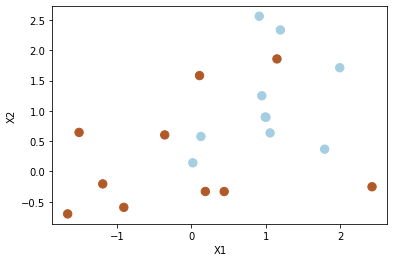

In [ ]:
# Scatter plot between the two features, where colour indicates the target class
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Linear or Not Linear ? Not Linear separable 

In [ ]:
# Fitting the Support Vector Classifier Model
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

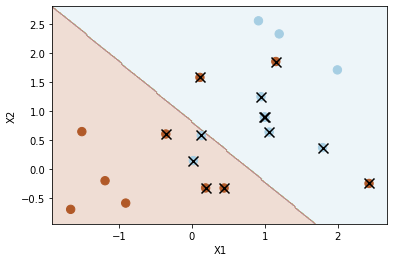

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)

Number of Support vecors? 13 vectors

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

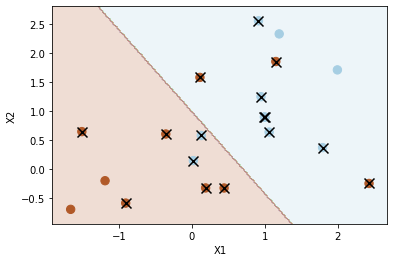

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)

plot_svc(svc2, X, y)

Number of support vectors? 16 vectors

c and no of vectors inversely related cause wider margin 

In [ ]:
# Performing cross validation 10-fold
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
clf.cv_results_ # Cross validation scores and errors for each split

{'mean_fit_time': array([0.00080674, 0.00059888, 0.00071676, 0.00058267, 0.00056789,
        0.00058255, 0.00071225]),
 'mean_score_time': array([0.00044205, 0.0003253 , 0.0004715 , 0.00031848, 0.00031333,
        0.00031843, 0.00032213]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

In [ ]:
clf.best_params_

{'C': 0.001}

In [ ]:
np.random.seed(1)
X_test = np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

In [ ]:
# Fitting SVC with best C value
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=['-1','+1'])

,-1,+1
-1,2,6
1,0,12


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual -1','Actual +1'], columns=['Predicted -1','Predicted +1'])

,Predicted -1,Predicted +1
Actual -1,2,6
Actual +1,0,12


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         8
           1       0.67      1.00      0.80        12

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



Text(0, 0.5, 'X2')

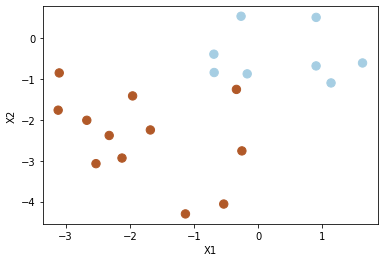

In [ ]:
# Making nearly linearly separable data
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

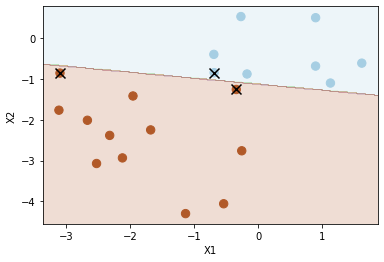

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

Number of support vectors? 3 vectors 

No training errors were made and only three support vectors were used.

However, we can see from the figure that the margin is very narrow (because the observations that are not support vectors, indicated as circles, are very close to the decision boundary). 

It seems likely that this model will perform poorly on test data. Let’s try a smaller value of cost:

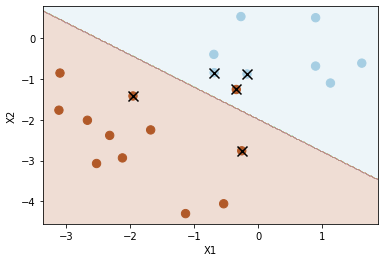

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear') 
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test)

Number of support vectors? 5 vectors 

Using cost = 1, we misclassify a training observation, but we also obtain a much wider margin and make use of five support vectors. 
It seems likely that this model will perform better on test data than the model with cost = 1e5.

Support Vectore Machine: Kernel Method

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

Text(0, 0.5, 'X2')

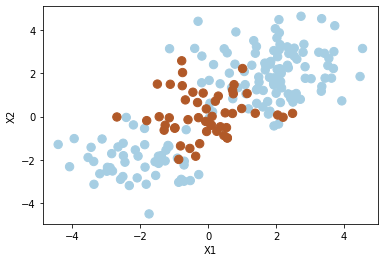

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

- When one class is stuck in middle of another ---> use RBF

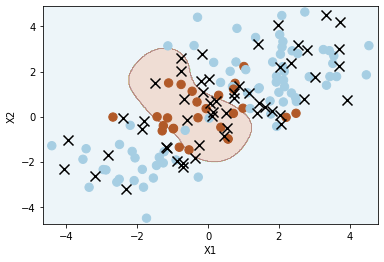

Number of support vectors:  54


In [ ]:
# Using the SVC() function with a radial kernel and γ = 1
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

The plot shows that the resulting SVM has a decidedly non-linear boundary. We can see from the figure that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce the number of training errors

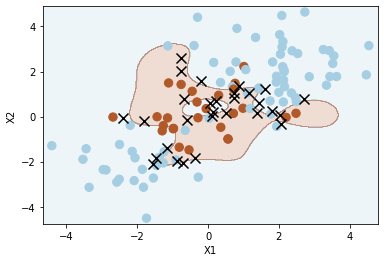

Number of support vectors:  29


In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

Number of vectors -> 29

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1, 'gamma': 0.5}

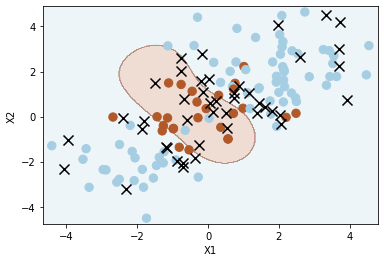

Number of support vectors:  44


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)

In [ ]:
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))

[[72  2]
 [12 14]]
0.86


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.97      0.91        74
           1       0.88      0.54      0.67        26

    accuracy                           0.86       100
   macro avg       0.87      0.76      0.79       100
weighted avg       0.86      0.86      0.85       100



Poly kernel 

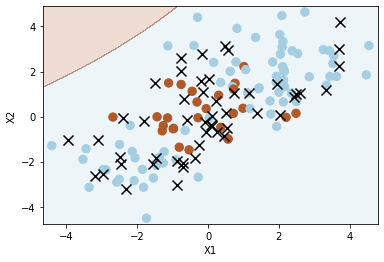

Number of support vectors:  50


In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='poly', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='poly'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 100, 'gamma': 2}

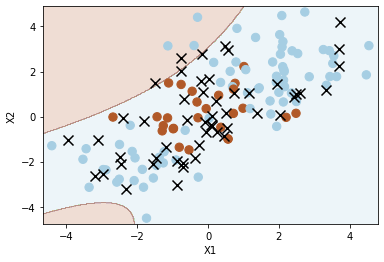

Number of support vectors:  51


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)

In [ ]:
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))

[[71  3]
 [26  0]]
0.71


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.73      0.96      0.83        74
           1       0.00      0.00      0.00        26

    accuracy                           0.71       100
   macro avg       0.37      0.48      0.42       100
weighted avg       0.54      0.71      0.61       100



Dataset - Pulsar


In [ ]:
import pandas as pd 

In [ ]:
from google.colab import drive #mounting google drive which contains the dataset 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DS

/content/drive/MyDrive/DS


In [ ]:
%pwd # checking the present directory which contains the dataset

'/content/drive/MyDrive/DS'

In [ ]:
train_data = pd.read_csv('pulsar_data_train.csv', encoding='cp1252', delimiter=',', quotechar='"') 
test_data = pd.read_csv('pulsar_data_test.csv', encoding='cp1252', delimiter=',', quotechar='"') 

In [ ]:
train_data


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [ ]:
print("Shape of data (samples, features): ",train_data.shape)


Shape of data (samples, features):  (12528, 9)


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [ ]:
train_data.isnull().sum()


 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

Missing values in:

Excess kurtosis of the integrated profile
Standard deviation of the DM-SNR curve
Skewness of the DM-SNR curve

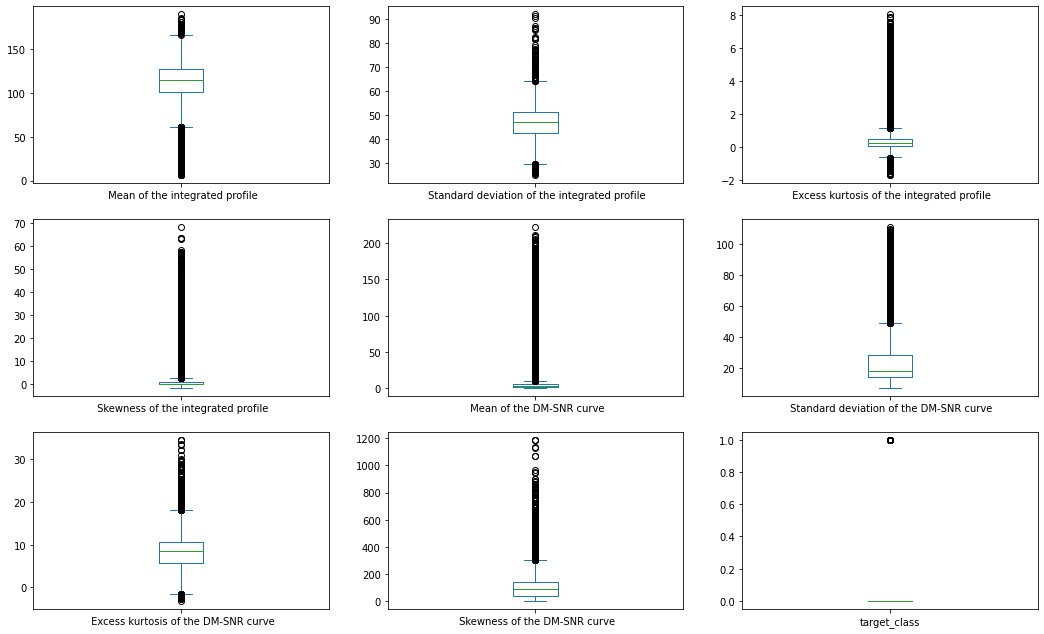

In [ ]:
import matplotlib.pyplot as plt

train_data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

Outliers need to be handled 


In [ ]:
train_data['target_class'].value_counts()


0.0    11375
1.0     1153
Name: target_class, dtype: int64

Data is imbalanced with approx 90% 10% spread of target class


Remove duplicates if any first 

In [ ]:
len(train_data)-len(train_data.drop_duplicates())


0

Handle null values first 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_knn(data):
    # imputation with KNN unsupervised method
    # separate dataframe into numerical/categorical
    ldf = data.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = data.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

    for col in cols_nan:                
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[data[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_putaside],axis=1)

In [ ]:
import numpy as np 
# Call function that imputes missing data
new_train_data = impute_knn(train_data)
# looks like we have a full feature matrix
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [ ]:
new_train_data.isnull().sum()


 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Now lets handle outliers using interquartiles 


In [ ]:
# Outliers using the IQR methode
def iqr_capping (data, coloumns, factor): # Factor = 1.5
        
    for col in coloumns:
        
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        upper_bound = Q3 + (factor * IQR)
        lower_bound = Q1 - (factor * IQR)

        data[col]=np.where(data[col]>upper_bound, upper_bound,
                       np.where(data[col]<lower_bound, lower_bound, data[col]))

In [ ]:
outliers = np.unique(iqr_capping(new_train_data, new_train_data.loc[:,:' Skewness of the DM-SNR curve'].columns , 1.5))


In [ ]:
new_train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


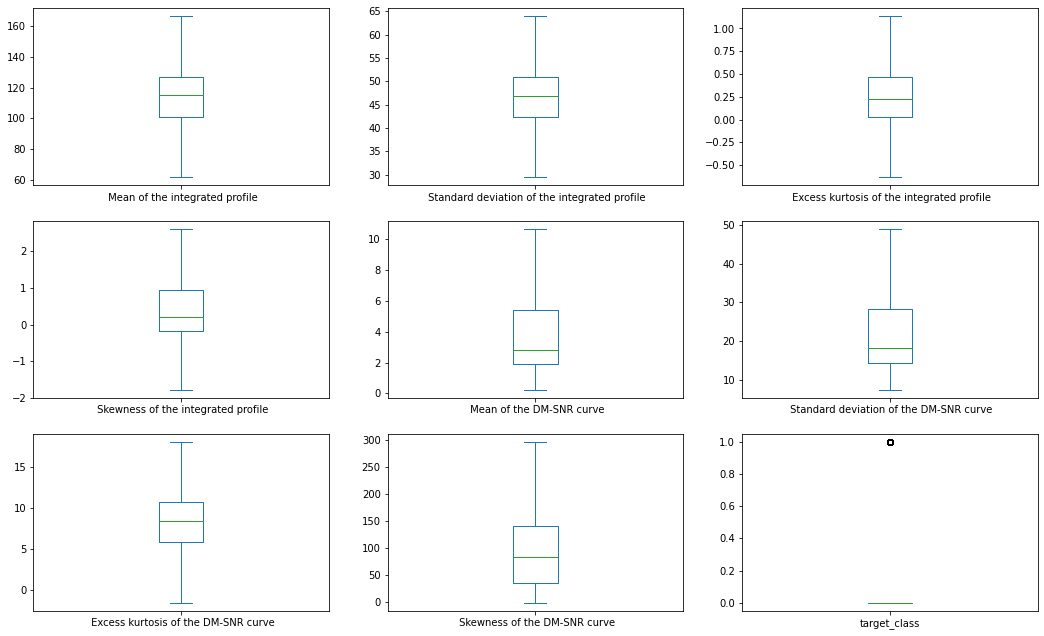

In [ ]:
new_train_data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

Now lets handle imbalance 

In [ ]:
from imblearn.over_sampling import SMOTE 


In [ ]:
x= new_train_data.drop('target_class', axis = 1).values
y=new_train_data['target_class'].values
y.shape

(12528,)

In [ ]:
sm = SMOTE( random_state=42)
x_resampled, y_resampled = sm.fit_resample(x,y)

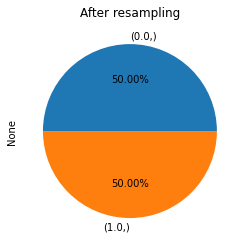

In [ ]:
y_resampled_pd = pd.DataFrame(data=y_resampled)
ax = y_resampled_pd.value_counts().plot.pie(autopct = '%.2f%%')
_ = ax.set_title("After resampling")

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_resampled,y_resampled, test_size=0.20 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
svm_rbf_pred = svm_rbf.predict(X_test_scaled)
print('Accuracy Score of Super Vector Machine, RBF kernel: ', accuracy_score(y_test, svm_rbf_pred))


Accuracy Score of Super Vector Machine, RBF kernel:  0.9474725274725275


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2305
         1.0       0.97      0.92      0.95      2245

    accuracy                           0.95      4550
   macro avg       0.95      0.95      0.95      4550
weighted avg       0.95      0.95      0.95      4550



In [ ]:
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
svm_linear_pred = svm_linear.predict(X_test_scaled)
print('Accuracy Score of Super Vector Machine, Linear kernel: ', accuracy_score(y_test, svm_linear_pred))

Accuracy Score of Super Vector Machine, Linear kernel:  0.9404395604395605


In [ ]:
print(classification_report(y_test, svm_linear_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2305
         1.0       0.96      0.92      0.94      2245

    accuracy                           0.94      4550
   macro avg       0.94      0.94      0.94      4550
weighted avg       0.94      0.94      0.94      4550



Conclusion - I understood the concept of Support Vector Machines and applied 3 types of kernels namely linear, poly, rbf.
I found that for data that is linearly separable, the linear kernel works the best. This is particularly useful when there is a large amount of data that is linearly separable as other kernels are not as fast as linear kernel.
For the data that is not linearly seperable, the radial basis function kernel worked better than the polynomial kernel. The polynomial kernel map the data into higher dimensional space and then applies linear svm.
Final Accuracies of the kernels were: 71% for polynomial kernel and 86% for RBF kernel.Also, I applied SVM on a pulsar dataset. Prepocessing steps of outlier detection and removal and minority sampling was perfomed and I observed that once again the accuracy of RBF kernel performed the best.